# Mailout dataset: EDA & pre-processing steps

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
  
%matplotlib inline


### my utils

from eda_utils import *

# 01. Load data

In [2]:
%%time
train = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', low_memory = False, index_col = 'LNR') 
train

CPU times: user 904 ms, sys: 220 ms, total: 1.12 s
Wall time: 1.12 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,NaN,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,2,1.0,0.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,1.0,1.0,1.0,4.0,8.0,7.0,1,0,1,4
67629,-1,1.0,0.0,NaN,NaN,NaN,NaN,14.0,1.0,0.0,...,1.0,1.0,1.0,5.0,9.0,7.0,1,0,1,3
68273,1,1.0,16.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,1.0,2.0,1.0,2.0,9.0,7.0,1,0,1,4


In [3]:
%%time
test = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';', low_memory = False, index_col = 'LNR') 
test

CPU times: user 951 ms, sys: 187 ms, total: 1.14 s
Wall time: 1.14 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,0.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,0.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,0.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67615,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1
67938,0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
67942,-1,1.0,16.0,14.0,17.0,NaN,NaN,15.0,1.0,0.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3


# 02. Features

## 02.01. Intro

CPU times: user 169 ms, sys: 11.5 ms, total: 181 ms
Wall time: 180 ms


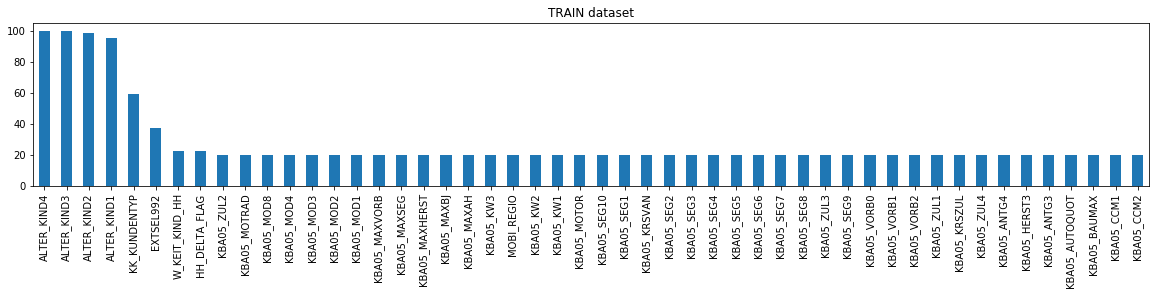

In [4]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)
empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

[]

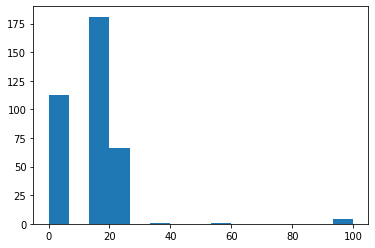

In [5]:
plt.hist(empty_cells_train,bins=15)
plt.plot()

CPU times: user 155 ms, sys: 3.2 ms, total: 159 ms
Wall time: 157 ms


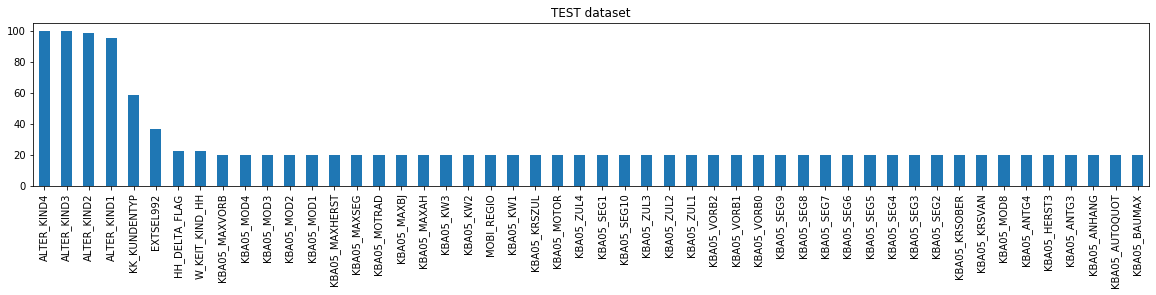

In [6]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

[]

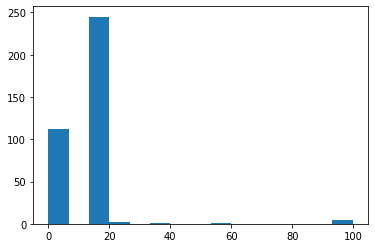

In [7]:
plt.hist(empty_cells_test,bins=15)
plt.plot()

In [8]:
missingness_threshold_percentage=30

In [9]:
print(np.sum(empty_cells_train>=missingness_threshold_percentage)
      ,np.sum(empty_cells_test>=missingness_threshold_percentage))

6 6


## 02.02. Undefined features

In [10]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [11]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

94 TRAIN dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


In [12]:
### metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [13]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

93 TEST dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


in "TRAIN" we have one additional column which lacks metadata information, but we know what is that column, it is a `RESPONSE` column,  that states whether or not a person became a customer of the company following the marketing campaign.

# 02.03. Missing features: correction

In [14]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [15]:

test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [16]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )



56 TRAIN dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


In [17]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

55 TEST dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


## 02.04. Feature missingness filtering

In [18]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)

CPU times: user 95.4 ms, sys: 0 ns, total: 95.4 ms
Wall time: 94.4 ms


In [19]:
%%time
features_to_drop_train =list( (empty_cells_train[empty_cells_train>missingness_threshold_percentage]).index.values)
train.drop(labels=features_to_drop_train,inplace=True,axis='columns')

print("Dropped {} TRAIN columns".format(len(features_to_drop_train)))

Dropped 31 TRAIN columns
CPU times: user 30.3 ms, sys: 225 µs, total: 30.5 ms
Wall time: 29.6 ms


CPU times: user 147 ms, sys: 3.97 ms, total: 151 ms
Wall time: 150 ms


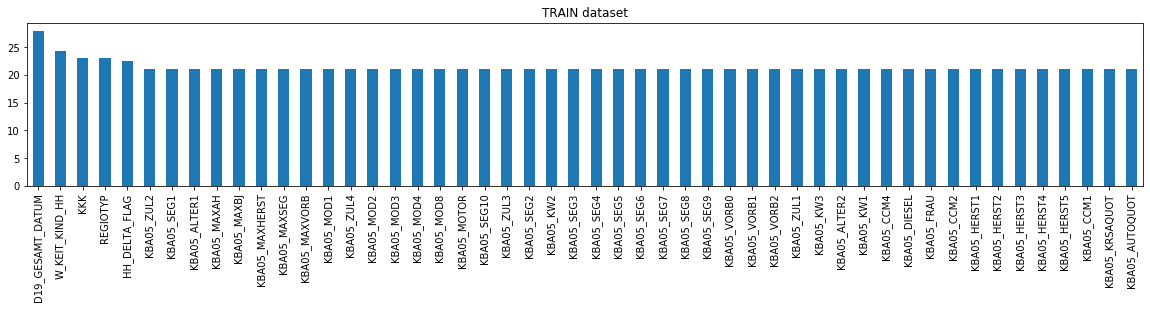

In [20]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

In [21]:
%%time
features_to_drop_test =list( (empty_cells_test[empty_cells_test>missingness_threshold_percentage]).index.values)
test.drop(labels=features_to_drop_test,inplace=True,axis='columns')

print("Dropped {} TEST columns".format(len(features_to_drop_test)))

Dropped 31 TEST columns
CPU times: user 20.5 ms, sys: 24.4 ms, total: 44.9 ms
Wall time: 43.7 ms


CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 148 ms


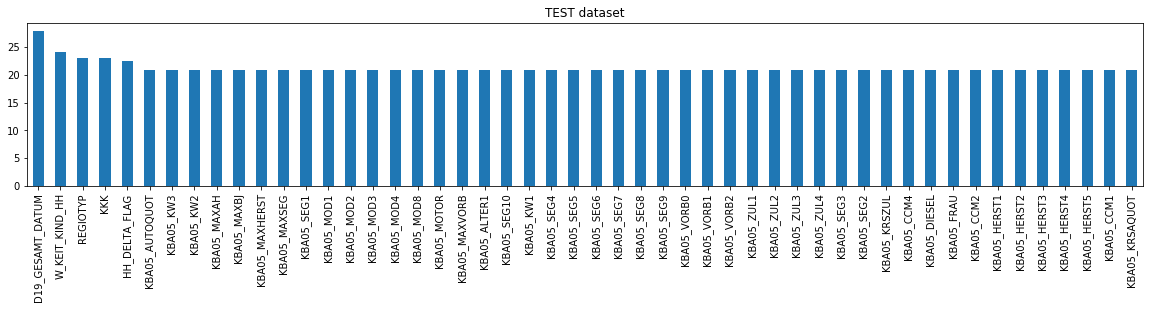

In [22]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

In [23]:
assert len(features_to_drop_test) == len(features_to_drop_train)

assert len(set(features_to_drop_test).intersection((set(features_to_drop_train)))) == len(features_to_drop_test)

We see that both for train and test we **removed 31 columns**, and these columns are THE SAME for both datasets

---
# 03. Missing rows

CPU times: user 147 ms, sys: 3.28 ms, total: 150 ms
Wall time: 148 ms


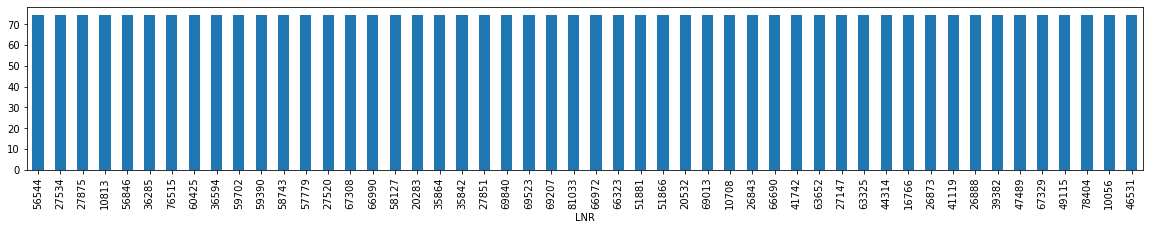

In [26]:
%%time
empty_rows_train = pd.isnull(train).sum(axis=1)*100.0/train.shape[1]
empty_rows_train = empty_rows_train.sort_values(ascending=False)
empty_rows_train[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 146 ms


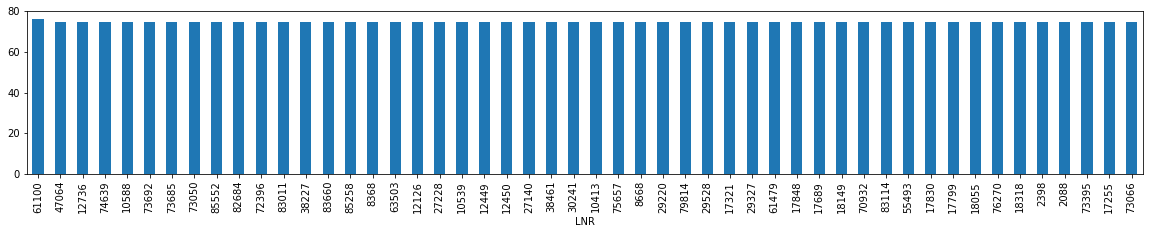

In [27]:
%%time
empty_rows_test = pd.isnull(test).sum(axis=1)*100.0/test.shape[1]
empty_rows_test = empty_rows_test.sort_values(ascending=False)
empty_rows_test[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

In [28]:
row_missingness_threshold_percentage = 50

In [29]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_train>row_missingness_threshold_percentage)*100/train.shape[0]

18.313858758903216

In [30]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_test>row_missingness_threshold_percentage)*100/test.shape[0]

18.056171643359093

We see that we have approximately 18% of subjects in the dataset that have missingness above defined threshold of `50%`. I might re-visit this threshold later, depending on the overall score of the subsequent classifier.

## We cannot remove `test` cases, final predictions have to be made for ALL 42833 TEST CASES!!!

[]

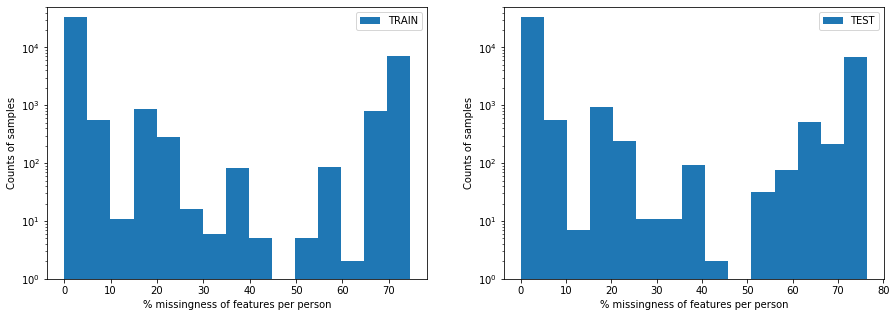

In [31]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(empty_rows_train,bins=15,label="TRAIN",log=True)
axs[0].set_ylim(1e0,5e4)
axs[0].legend()
axs[0].set_xlabel("% missingness of features per person")
axs[0].set_ylabel("Counts of samples")

axs[1].hist(empty_rows_test,bins=15,label="TEST",log=True)
axs[1].set_ylim(1e0,5e4)
axs[1].legend()
axs[1].set_xlabel("% missingness of features per person")
axs[1].set_ylabel("Counts of samples")

plt.plot()

In [63]:
%%time
samples_to_drop_train =list( (empty_rows_train[empty_rows_train>row_missingness_threshold_percentage]).index.values)
try:
    train.drop(labels=samples_to_drop_train,inplace=True,axis='index')
except KeyError:
    print("Already deleted")

print("{} TRAIN samples dropped".format(len(samples_to_drop_train)))

Already deleted
7868 TRAIN samples dropped
CPU times: user 4.64 ms, sys: 50 µs, total: 4.69 ms
Wall time: 3.66 ms


In [65]:
assert test.shape[0]==42833

# 04. Data types and & feature encoding

I am going to apply the SAME logic as in the previous notebooks 01 and 02. Except here I have additional column only for TRAIN dataset `RESPONSE` that is assumed to be a binary variable, and is already encoded as 0/1 (see below)

In [66]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 


test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [67]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

51 TRAIN dataset features lacking metadata information, while there are 30 features not used by provided dataset. 
50 TEST dataset features lacking metadata information, while there are 30 features not used by provided dataset. 


# Imputing missing features.

# TODO [remove]

- add general population for imputing!

## a. concatenating train/test
Our data still has lots of missing entries. Analogically to a notebook in `Unsupervised/Unsupervised_Customer_Segmentation.ipynb` I am going to use a IterativeImputer in an attempt to ?

In [106]:
train['dataset']='train'
test['dataset']='test'

joint_dataset = pd.concat([train,test])

metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

joint_dataset,missing_metadata_annotations_joint,not_present_features_joint = \
 unknown_to_nan(joint_dataset, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 


Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [110]:

print("{} JOINT dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_joint), len(not_present_features_joint) ) )


52 JOINT dataset features lacking metadata information, while there are 30 features not used by provided dataset. 


In [111]:

missing_metadata_feature_info =  {}
missing_metadata_feature_info['Attribute'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations_joint:
    unique_vals =  np.unique(joint_dataset[f].dropna() )
    
    missing_metadata_feature_info['Attribute'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)


missing_metadata_feature_info_joint = missing_metadata_feature_info
missing_metadata_feature_info_joint

,Attribute,unique_counts,unique_vals
6,EINGEFUEGT_AM,2096,"[1991-08-30 00:00:00, 1992-02-10 00:00:00, 199..."
4,ANZ_STATISTISCHE_HAUSHALTE,200,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
13,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
38,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
32,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991...."
48,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
22,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
28,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
8,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
40,D19_VERSI_ONLINE_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


As with `AZDIAS` and `Customers` dataset, as here we need to remove `EINGEFUEGT_AM` column, and encode `ANZ_STATISTISCHE_HAUSHALTE` as numerical and the remaining features to be encoded as categorical.

In [112]:
missing_metadata_feature_info_joint['Type']= 'categorical' # categorical as default

##### dropping EINGEFUEGT_AM_idx 

### from `missing_metadata_feature_info`
EINGEFUEGT_AM_idx = missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info_joint.drop(axis='index', inplace=True, index = EINGEFUEGT_AM_idx )

# Manually set specific features to numerical upon inspection
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='ANZ_STATISTISCHE_HAUSHALTE', 'Type'] = 'numerical'
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='VERDICHTUNGSRAUM', 'Type'] = 'numerical'
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='EINGEZOGENAM_HH_JAHR', 'Type'] = 'numerical'


### from joint DATASET remove following columns: EINGEFUEGT_AM
try:
    joint_dataset.drop(columns='EINGEFUEGT_AM',inplace=True)
except KeyError:
    print("EINGEFUEGT_AM already deleted from train")

    
missing_metadata_feature_info_joint.head()

,Attribute,unique_counts,unique_vals,Type
4,ANZ_STATISTISCHE_HAUSHALTE,200,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
13,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
38,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK...",categorical
32,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991....",numerical
48,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical


(array([246.,   0.,   0.,   0.,   0.,  79.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

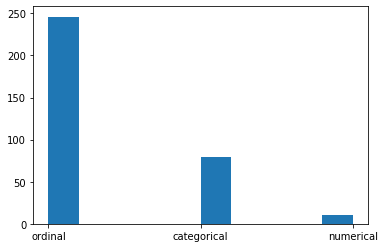

In [113]:
missing_metadata_feature_info_joint = missing_metadata_feature_info_joint[['Attribute','Type']]

all_feature_types = pd.read_csv('metadata_feature_types.tsv',sep="\t").dropna()
all_feature_types = pd.concat([all_feature_types,missing_metadata_feature_info_joint])

# must be in joint dataset
all_feature_types.index = all_feature_types['Attribute']
# features that have filtered AZDIAS entry
all_feature_types = all_feature_types.loc[ set(all_feature_types['Attribute'] ).intersection( (set(joint_dataset.columns  )))  ]

plt.hist(all_feature_types['Type'])


**NOTE**: below I am copying some code from `EDA/03_Concatenate_and_Impute.ipynb`

It is basically a boilerplate to replace values for categories that in fact code for the same thing

## b. standardizing selected features

In [114]:

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


joint_dataset['LP_FAMILIE_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(7,6,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(8,6,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(10,9,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(11,9,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(0,np.nan,inplace=True)


print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


Before standarization we have classes: [0. 1. 2. 3. 4. 5.]
After standarization we have classes: [1. 2. 3.]


In [115]:
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))

joint_dataset['LP_STATUS_GROB'].replace(2,1,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_STATUS_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(7,6,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(9,8,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))


Before standarization we have classes: [1. 2. 3. 4. 5.]
After standarization we have classes: [1. 3.]


In [116]:
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM']= joint_dataset['PRAEGENDE_JUGENDJAHRE']

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE'].dropna())))

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(2,1,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(4,3,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(6,5,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(7,5,inplace=True)
 
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(9,8,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(11,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(12,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(13,10,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(15,14,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].dropna())))


Before standarization we have classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
After standarization we have classes: [ 1.  3.  5.  8. 10. 14.]


In [117]:
joint_dataset['CAMEO_DEUINTL_2015_SIM'] = joint_dataset['CAMEO_DEUINTL_2015']

 
    
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('12','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('13','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('14','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('15','11',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('22','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('23','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('24','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('25','21',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('32','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('33','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('34','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('35','31',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('42','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('43','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('44','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('45','41',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('52','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('53','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('54','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('55','51',inplace=True)
    
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('XX',np.nan,inplace=True)    
    
print("After standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))


Before standarization we have classes: ['12' '13' '14' '15' '22' '23' '24' '25' '31' '32' '33' '34' '35' '41'
 '43' '44' '45' '51' '52' '54' '55' 'XX']
After standarization we have classes: ['11' '21' '31' '41' '51']


## c. encoding categorical values

In [118]:
categorical_features = list(all_feature_types[all_feature_types['Type']=='categorical']['Attribute'])

categorical_features.append('dataset')
len(categorical_features)

80

66


(array([59., 10.,  6.,  1.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([ 2. ,  6.3, 10.6, 14.9, 19.2, 23.5, 27.8, 32.1, 36.4, 40.7, 45. ]),
 <a list of 10 Patch objects>)

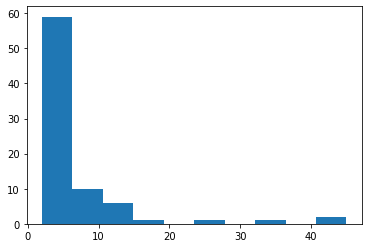

In [119]:
categorical_features_count = {'feature': [], 'counts':[]}

for f in categorical_features:

    categorical_features_count['feature'].append(f)
    
    categorical_features_count['counts'].append(len(np.unique(joint_dataset[f].dropna())  ) )


categorical_features_count = pd.DataFrame(categorical_features_count)

categorical_features_to_one_hot = list( categorical_features_count[categorical_features_count['counts']>2]['feature'])
print(len(categorical_features_to_one_hot))

plt.hist(categorical_features_count['counts'])

In [120]:
print(joint_dataset.shape)
joint_dataset = pd.get_dummies(joint_dataset,columns=categorical_features_to_one_hot)
print(joint_dataset.shape)

(77927, 337)
(77927, 811)


## d. encode non-numerical (categorical and ordinal) features

In [124]:
numerical_features = list(all_feature_types[all_feature_types['Type']=='numerical']['Attribute'])
not_numerical_features  = [f for f in joint_dataset.columns if f not in numerical_features]


In [125]:
from sklearn.preprocessing import LabelEncoder
LabelEncoders = { x: LabelEncoder() for x in not_numerical_features  }

for idx,feature in enumerate(not_numerical_features):
    print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature ))
    
    # NA mask - label encoder cannot handle missing values (i.e. NAs)
    not_na_mask =  joint_dataset[feature].notnull() # FALSE for NA, TRUE for some value
    
    joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )

1/801: BALLRAUM
2/801: CAMEO_DEUG_2015
3/801: CAMEO_DEUINTL_2015


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


4/801: D19_BANKEN_DIREKT_RZ
5/801: D19_BANKEN_GROSS_RZ
6/801: D19_BANKEN_LOKAL_RZ
7/801: D19_BANKEN_ONLINE_QUOTE_12
8/801: D19_BANKEN_REST_RZ
9/801: D19_BEKLEIDUNG_GEH_RZ
10/801: D19_BEKLEIDUNG_REST_RZ
11/801: D19_BILDUNG_RZ
12/801: D19_BIO_OEKO_RZ
13/801: D19_BUCH_RZ
14/801: D19_DIGIT_SERV_RZ
15/801: D19_DROGERIEARTIKEL_RZ
16/801: D19_ENERGIE_RZ
17/801: D19_FREIZEIT_RZ
18/801: D19_GARTEN_RZ
19/801: D19_GESAMT_DATUM
20/801: D19_GESAMT_ONLINE_QUOTE_12
21/801: D19_HANDWERK_RZ
22/801: D19_HAUS_DEKO_RZ
23/801: D19_KINDERARTIKEL_RZ
24/801: D19_KOSMETIK_RZ
25/801: D19_LEBENSMITTEL_RZ
26/801: D19_LOTTO_RZ
27/801: D19_NAHRUNGSERGAENZUNG_RZ
28/801: D19_RATGEBER_RZ
29/801: D19_REISEN_RZ
30/801: D19_SAMMELARTIKEL_RZ
31/801: D19_SCHUHE_RZ
32/801: D19_SONSTIGE_RZ
33/801: D19_TECHNIK_RZ
34/801: D19_TELKO_MOBILE_RZ
35/801: D19_TELKO_REST_RZ
36/801: D19_TIERARTIKEL_RZ
37/801: D19_VERSAND_ONLINE_QUOTE_12
38/801: D19_VERSAND_REST_RZ
39/801: D19_VERSICHERUNGEN_RZ
40/801: D19_VOLLSORTIMENT_RZ
41/801: D19_

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

266/801: CJT_TYP_4_5.0
267/801: D19_VERSI_ONLINE_QUOTE_12_0.0
268/801: D19_VERSI_ONLINE_QUOTE_12_3.0
269/801: D19_VERSI_ONLINE_QUOTE_12_5.0
270/801: D19_VERSI_ONLINE_QUOTE_12_10.0
271/801: FIRMENDICHTE_1.0
272/801: FIRMENDICHTE_2.0
273/801: FIRMENDICHTE_3.0
274/801: FIRMENDICHTE_4.0
275/801: FIRMENDICHTE_5.0
276/801: D19_TELKO_ONLINE_QUOTE_12_0.0
277/801: D19_TELKO_ONLINE_QUOTE_12_5.0
278/801: D19_TELKO_ONLINE_QUOTE_12_10.0
279/801: PRAEGENDE_JUGENDJAHRE_1.0
280/801: PRAEGENDE_JUGENDJAHRE_2.0
281/801: PRAEGENDE_JUGENDJAHRE_3.0
282/801: PRAEGENDE_JUGENDJAHRE_4.0
283/801: PRAEGENDE_JUGENDJAHRE_5.0
284/801: PRAEGENDE_JUGENDJAHRE_6.0
285/801: PRAEGENDE_JUGENDJAHRE_7.0
286/801: PRAEGENDE_JUGENDJAHRE_8.0
287/801: PRAEGENDE_JUGENDJAHRE_9.0
288/801: PRAEGENDE_JUGENDJAHRE_10.0
289/801: PRAEGENDE_JUGENDJAHRE_11.0
290/801: PRAEGENDE_JUGENDJAHRE_12.0
291/801: PRAEGENDE_JUGENDJAHRE_13.0
292/801: PRAEGENDE_JUGENDJAHRE_14.0
293/801: PRAEGENDE_JUGENDJAHRE_15.0
294/801: ARBEIT_1.0
295/801: ARBEIT_2.0
2

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

302/801: STRUKTURTYP_3.0
303/801: VHA_0.0
304/801: VHA_1.0
305/801: VHA_2.0
306/801: VHA_3.0
307/801: VHA_4.0
308/801: VHA_5.0
309/801: KBA13_GBZ_1.0
310/801: KBA13_GBZ_2.0
311/801: KBA13_GBZ_3.0
312/801: KBA13_GBZ_4.0
313/801: KBA13_GBZ_5.0
314/801: CJT_TYP_6_1.0
315/801: CJT_TYP_6_2.0
316/801: CJT_TYP_6_3.0
317/801: CJT_TYP_6_4.0
318/801: CJT_TYP_6_5.0
319/801: D19_SOZIALES_0.0
320/801: D19_SOZIALES_1.0
321/801: D19_SOZIALES_2.0
322/801: D19_SOZIALES_3.0
323/801: D19_SOZIALES_4.0
324/801: D19_SOZIALES_5.0
325/801: LP_STATUS_FEIN_1.0
326/801: LP_STATUS_FEIN_2.0
327/801: LP_STATUS_FEIN_3.0
328/801: LP_STATUS_FEIN_4.0
329/801: LP_STATUS_FEIN_5.0
330/801: LP_STATUS_FEIN_6.0
331/801: LP_STATUS_FEIN_7.0
332/801: LP_STATUS_FEIN_8.0
333/801: LP_STATUS_FEIN_9.0
334/801: LP_STATUS_FEIN_10.0
335/801: CJT_TYP_1_1.0
336/801: CJT_TYP_1_2.0
337/801: CJT_TYP_1_3.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

338/801: CJT_TYP_1_4.0
339/801: CJT_TYP_1_5.0
340/801: CJT_TYP_2_1.0
341/801: CJT_TYP_2_2.0
342/801: CJT_TYP_2_3.0
343/801: CJT_TYP_2_4.0
344/801: CJT_TYP_2_5.0
345/801: LP_FAMILIE_GROB_1.0
346/801: LP_FAMILIE_GROB_2.0
347/801: LP_FAMILIE_GROB_3.0
348/801: FINANZTYP_1
349/801: FINANZTYP_2
350/801: FINANZTYP_3
351/801: FINANZTYP_4
352/801: FINANZTYP_5
353/801: FINANZTYP_6
354/801: RT_UEBERGROESSE_0.0
355/801: RT_UEBERGROESSE_1.0
356/801: RT_UEBERGROESSE_2.0
357/801: RT_UEBERGROESSE_3.0
358/801: RT_UEBERGROESSE_4.0
359/801: RT_UEBERGROESSE_5.0
360/801: ZABEOTYP_1
361/801: ZABEOTYP_2
362/801: ZABEOTYP_3
363/801: ZABEOTYP_4
364/801: ZABEOTYP_5
365/801: ZABEOTYP_6
366/801: D19_VERSI_DATUM_1
367/801: D19_VERSI_DATUM_2
368/801: D19_VERSI_DATUM_3
369/801: D19_VERSI_DATUM_4
370/801: D19_VERSI_DATUM_5
371/801: D19_VERSI_DATUM_6
372/801: D19_VERSI_DATUM_7
373/801: D19_VERSI_DATUM_8


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

374/801: D19_VERSI_DATUM_9
375/801: D19_VERSI_DATUM_10
376/801: GEBAEUDETYP_1.0
377/801: GEBAEUDETYP_2.0
378/801: GEBAEUDETYP_3.0
379/801: GEBAEUDETYP_4.0
380/801: GEBAEUDETYP_6.0
381/801: GEBAEUDETYP_8.0
382/801: REGIOTYP_1.0
383/801: REGIOTYP_2.0
384/801: REGIOTYP_3.0
385/801: REGIOTYP_4.0
386/801: REGIOTYP_5.0
387/801: REGIOTYP_6.0
388/801: REGIOTYP_7.0
389/801: MOBI_RASTER_1.0
390/801: MOBI_RASTER_2.0
391/801: MOBI_RASTER_3.0
392/801: MOBI_RASTER_4.0
393/801: MOBI_RASTER_5.0
394/801: MOBI_RASTER_6.0
395/801: D19_KONSUMTYP_MAX_1
396/801: D19_KONSUMTYP_MAX_2
397/801: D19_KONSUMTYP_MAX_3
398/801: D19_KONSUMTYP_MAX_4
399/801: D19_KONSUMTYP_MAX_8
400/801: D19_KONSUMTYP_MAX_9
401/801: GEBAEUDETYP_RASTER_1.0
402/801: GEBAEUDETYP_RASTER_2.0
403/801: GEBAEUDETYP_RASTER_3.0
404/801: GEBAEUDETYP_RASTER_4.0
405/801: GEBAEUDETYP_RASTER_5.0
406/801: UMFELD_ALT_1.0
407/801: UMFELD_ALT_2.0
408/801: UMFELD_ALT_3.0
409/801: UMFELD_ALT_4.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

410/801: UMFELD_ALT_5.0
411/801: VK_DHT4A_1.0
412/801: VK_DHT4A_2.0
413/801: VK_DHT4A_3.0
414/801: VK_DHT4A_4.0
415/801: VK_DHT4A_5.0
416/801: VK_DHT4A_6.0
417/801: VK_DHT4A_7.0
418/801: VK_DHT4A_8.0
419/801: VK_DHT4A_9.0
420/801: VK_DHT4A_10.0
421/801: VK_DHT4A_11.0
422/801: ALTERSKATEGORIE_GROB_1
423/801: ALTERSKATEGORIE_GROB_2
424/801: ALTERSKATEGORIE_GROB_3
425/801: ALTERSKATEGORIE_GROB_4
426/801: ALTERSKATEGORIE_GROB_9
427/801: RETOURTYP_BK_S_1.0
428/801: RETOURTYP_BK_S_2.0
429/801: RETOURTYP_BK_S_3.0
430/801: RETOURTYP_BK_S_4.0
431/801: RETOURTYP_BK_S_5.0
432/801: AKT_DAT_KL_1.0
433/801: AKT_DAT_KL_2.0
434/801: AKT_DAT_KL_3.0
435/801: AKT_DAT_KL_4.0
436/801: AKT_DAT_KL_5.0
437/801: AKT_DAT_KL_6.0
438/801: AKT_DAT_KL_7.0
439/801: AKT_DAT_KL_8.0
440/801: AKT_DAT_KL_9.0
441/801: KBA13_ANTG4_0.0
442/801: KBA13_ANTG4_1.0
443/801: KBA13_ANTG4_2.0
444/801: VK_ZG11_1.0
445/801: VK_ZG11_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

446/801: VK_ZG11_3.0
447/801: VK_ZG11_4.0
448/801: VK_ZG11_5.0
449/801: VK_ZG11_6.0
450/801: VK_ZG11_7.0
451/801: VK_ZG11_8.0
452/801: VK_ZG11_9.0
453/801: VK_ZG11_10.0
454/801: VK_ZG11_11.0
455/801: D19_VERSI_OFFLINE_DATUM_1
456/801: D19_VERSI_OFFLINE_DATUM_2
457/801: D19_VERSI_OFFLINE_DATUM_3
458/801: D19_VERSI_OFFLINE_DATUM_4
459/801: D19_VERSI_OFFLINE_DATUM_5
460/801: D19_VERSI_OFFLINE_DATUM_6
461/801: D19_VERSI_OFFLINE_DATUM_7
462/801: D19_VERSI_OFFLINE_DATUM_8
463/801: D19_VERSI_OFFLINE_DATUM_9
464/801: D19_VERSI_OFFLINE_DATUM_10
465/801: LP_FAMILIE_FEIN_0.0
466/801: LP_FAMILIE_FEIN_1.0
467/801: LP_FAMILIE_FEIN_2.0
468/801: LP_FAMILIE_FEIN_3.0
469/801: LP_FAMILIE_FEIN_4.0
470/801: LP_FAMILIE_FEIN_5.0
471/801: LP_FAMILIE_FEIN_6.0
472/801: LP_FAMILIE_FEIN_7.0
473/801: LP_FAMILIE_FEIN_8.0
474/801: LP_FAMILIE_FEIN_9.0
475/801: LP_FAMILIE_FEIN_10.0
476/801: LP_FAMILIE_FEIN_11.0
477/801: ANZ_KINDER_0.0
478/801: ANZ_KINDER_1.0
479/801: ANZ_KINDER_2.0
480/801: ANZ_KINDER_3.0
481/801: ANZ

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

482/801: ANZ_KINDER_5.0
483/801: ANZ_KINDER_6.0
484/801: ANZ_KINDER_7.0
485/801: KBA05_MODTEMP_1.0
486/801: KBA05_MODTEMP_2.0
487/801: KBA05_MODTEMP_3.0
488/801: KBA05_MODTEMP_4.0
489/801: KBA05_MODTEMP_5.0
490/801: KBA05_MODTEMP_6.0
491/801: KBA13_HHZ_1.0
492/801: KBA13_HHZ_2.0
493/801: KBA13_HHZ_3.0
494/801: KBA13_HHZ_4.0
495/801: KBA13_HHZ_5.0
496/801: KBA13_ANTG1_0.0
497/801: KBA13_ANTG1_1.0
498/801: KBA13_ANTG1_2.0
499/801: KBA13_ANTG1_3.0
500/801: KBA13_ANTG1_4.0
501/801: RT_KEIN_ANREIZ_1.0
502/801: RT_KEIN_ANREIZ_2.0
503/801: RT_KEIN_ANREIZ_3.0
504/801: RT_KEIN_ANREIZ_4.0
505/801: RT_KEIN_ANREIZ_5.0
506/801: SHOPPER_TYP_0.0
507/801: SHOPPER_TYP_1.0
508/801: SHOPPER_TYP_2.0
509/801: SHOPPER_TYP_3.0
510/801: KBA13_ANTG3_0.0
511/801: KBA13_ANTG3_1.0
512/801: KBA13_ANTG3_2.0
513/801: KBA13_ANTG3_3.0
514/801: LP_LEBENSPHASE_FEIN_0.0
515/801: LP_LEBENSPHASE_FEIN_1.0
516/801: LP_LEBENSPHASE_FEIN_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

517/801: LP_LEBENSPHASE_FEIN_3.0
518/801: LP_LEBENSPHASE_FEIN_4.0
519/801: LP_LEBENSPHASE_FEIN_5.0
520/801: LP_LEBENSPHASE_FEIN_6.0
521/801: LP_LEBENSPHASE_FEIN_7.0
522/801: LP_LEBENSPHASE_FEIN_8.0
523/801: LP_LEBENSPHASE_FEIN_9.0
524/801: LP_LEBENSPHASE_FEIN_10.0
525/801: LP_LEBENSPHASE_FEIN_11.0
526/801: LP_LEBENSPHASE_FEIN_12.0
527/801: LP_LEBENSPHASE_FEIN_13.0
528/801: LP_LEBENSPHASE_FEIN_14.0
529/801: LP_LEBENSPHASE_FEIN_15.0
530/801: LP_LEBENSPHASE_FEIN_16.0
531/801: LP_LEBENSPHASE_FEIN_17.0
532/801: LP_LEBENSPHASE_FEIN_18.0
533/801: LP_LEBENSPHASE_FEIN_19.0
534/801: LP_LEBENSPHASE_FEIN_20.0
535/801: LP_LEBENSPHASE_FEIN_21.0
536/801: LP_LEBENSPHASE_FEIN_22.0
537/801: LP_LEBENSPHASE_FEIN_23.0
538/801: LP_LEBENSPHASE_FEIN_24.0
539/801: LP_LEBENSPHASE_FEIN_25.0
540/801: LP_LEBENSPHASE_FEIN_26.0
541/801: LP_LEBENSPHASE_FEIN_27.0
542/801: LP_LEBENSPHASE_FEIN_28.0
543/801: LP_LEBENSPHASE_FEIN_29.0
544/801: LP_LEBENSPHASE_FEIN_30.0
545/801: LP_LEBENSPHASE_FEIN_31.0
546/801: LP_LEBENSPHA

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

590/801: GFK_URLAUBERTYP_1.0
591/801: GFK_URLAUBERTYP_2.0
592/801: GFK_URLAUBERTYP_3.0
593/801: GFK_URLAUBERTYP_4.0
594/801: GFK_URLAUBERTYP_5.0
595/801: GFK_URLAUBERTYP_6.0
596/801: GFK_URLAUBERTYP_7.0
597/801: GFK_URLAUBERTYP_8.0
598/801: GFK_URLAUBERTYP_9.0
599/801: GFK_URLAUBERTYP_10.0
600/801: GFK_URLAUBERTYP_11.0
601/801: GFK_URLAUBERTYP_12.0
602/801: GEMEINDETYP_11.0
603/801: GEMEINDETYP_12.0
604/801: GEMEINDETYP_21.0
605/801: GEMEINDETYP_22.0
606/801: GEMEINDETYP_30.0
607/801: GEMEINDETYP_40.0
608/801: GEMEINDETYP_50.0
609/801: KBA13_KMH_210_1.0
610/801: KBA13_KMH_210_2.0
611/801: KBA13_KMH_210_3.0
612/801: KBA13_KMH_210_4.0
613/801: KBA13_KMH_210_5.0
614/801: UMFELD_JUNG_1.0
615/801: UMFELD_JUNG_2.0
616/801: UMFELD_JUNG_3.0
617/801: UMFELD_JUNG_4.0
618/801: UMFELD_JUNG_5.0
619/801: CAMEO_DEU_2015_1A
620/801: CAMEO_DEU_2015_1B
621/801: CAMEO_DEU_2015_1C
622/801: CAMEO_DEU_2015_1D
623/801: CAMEO_DEU_2015_1E
624/801: CAMEO_DEU_2015_2A
625/801: CAMEO_DEU_2015_2B
626/801: CAMEO_DEU

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

627/801: CAMEO_DEU_2015_2D
628/801: CAMEO_DEU_2015_3A
629/801: CAMEO_DEU_2015_3B
630/801: CAMEO_DEU_2015_3C
631/801: CAMEO_DEU_2015_3D
632/801: CAMEO_DEU_2015_4A
633/801: CAMEO_DEU_2015_4B
634/801: CAMEO_DEU_2015_4C
635/801: CAMEO_DEU_2015_4D
636/801: CAMEO_DEU_2015_4E
637/801: CAMEO_DEU_2015_5A
638/801: CAMEO_DEU_2015_5B
639/801: CAMEO_DEU_2015_5C
640/801: CAMEO_DEU_2015_5D
641/801: CAMEO_DEU_2015_5E
642/801: CAMEO_DEU_2015_5F
643/801: CAMEO_DEU_2015_6A
644/801: CAMEO_DEU_2015_6B
645/801: CAMEO_DEU_2015_6C
646/801: CAMEO_DEU_2015_6D
647/801: CAMEO_DEU_2015_6E
648/801: CAMEO_DEU_2015_6F
649/801: CAMEO_DEU_2015_7A
650/801: CAMEO_DEU_2015_7B
651/801: CAMEO_DEU_2015_7C
652/801: CAMEO_DEU_2015_7D
653/801: CAMEO_DEU_2015_7E
654/801: CAMEO_DEU_2015_8A
655/801: CAMEO_DEU_2015_8B
656/801: CAMEO_DEU_2015_8C
657/801: CAMEO_DEU_2015_8D
658/801: CAMEO_DEU_2015_9A
659/801: CAMEO_DEU_2015_9B
660/801: CAMEO_DEU_2015_9C
661/801: CAMEO_DEU_2015_9D
662/801: CAMEO_DEU_2015_9E
663/801: CAMEO_DEU_2015_XX


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

664/801: KBA05_HERSTTEMP_1.0
665/801: KBA05_HERSTTEMP_2.0
666/801: KBA05_HERSTTEMP_3.0
667/801: KBA05_HERSTTEMP_4.0
668/801: KBA05_HERSTTEMP_5.0
669/801: HEALTH_TYP_1.0
670/801: HEALTH_TYP_2.0
671/801: HEALTH_TYP_3.0
672/801: KOMBIALTER_1
673/801: KOMBIALTER_2
674/801: KOMBIALTER_3
675/801: KOMBIALTER_4
676/801: KOMBIALTER_9
677/801: KBA13_ANTG2_0.0
678/801: KBA13_ANTG2_1.0
679/801: KBA13_ANTG2_2.0
680/801: KBA13_ANTG2_3.0
681/801: KBA13_ANTG2_4.0
682/801: VK_DISTANZ_1.0
683/801: VK_DISTANZ_2.0
684/801: VK_DISTANZ_3.0
685/801: VK_DISTANZ_4.0
686/801: VK_DISTANZ_5.0
687/801: VK_DISTANZ_6.0
688/801: VK_DISTANZ_7.0
689/801: VK_DISTANZ_8.0
690/801: VK_DISTANZ_9.0
691/801: VK_DISTANZ_10.0
692/801: VK_DISTANZ_11.0
693/801: VK_DISTANZ_12.0
694/801: VK_DISTANZ_13.0
695/801: NATIONALITAET_KZ_1.0
696/801: NATIONALITAET_KZ_2.0
697/801: NATIONALITAET_KZ_3.0
698/801: RT_SCHNAEPPCHEN_1.0
699/801: RT_SCHNAEPPCHEN_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

700/801: RT_SCHNAEPPCHEN_3.0
701/801: RT_SCHNAEPPCHEN_4.0
702/801: RT_SCHNAEPPCHEN_5.0
703/801: CJT_KATALOGNUTZER_1.0
704/801: CJT_KATALOGNUTZER_2.0
705/801: CJT_KATALOGNUTZER_3.0
706/801: CJT_KATALOGNUTZER_4.0
707/801: CJT_KATALOGNUTZER_5.0
708/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_DIREKT
709/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_GROSS
710/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL
711/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_REST
712/801: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH
713/801: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_REST
714/801: D19_LETZTER_KAUF_BRANCHE_D19_BILDUNG
715/801: D19_LETZTER_KAUF_BRANCHE_D19_BIO_OEKO
716/801: D19_LETZTER_KAUF_BRANCHE_D19_BUCH_CD
717/801: D19_LETZTER_KAUF_BRANCHE_D19_DIGIT_SERV
718/801: D19_LETZTER_KAUF_BRANCHE_D19_DROGERIEARTIKEL
719/801: D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE
720/801: D19_LETZTER_KAUF_BRANCHE_D19_FREIZEIT
721/801: D19_LETZTER_KAUF_BRANCHE_D19_GARTEN
722/801: D19_LETZTER_KAUF_BRANCHE_D19_HANDWERK
723/801: D19_LETZTER

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

737/801: D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL
738/801: D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT
739/801: D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST
740/801: D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN
741/801: D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT
742/801: D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST
743/801: CJT_GESAMTTYP_1.0
744/801: CJT_GESAMTTYP_2.0
745/801: CJT_GESAMTTYP_3.0
746/801: CJT_GESAMTTYP_4.0
747/801: CJT_GESAMTTYP_5.0
748/801: CJT_GESAMTTYP_6.0
749/801: D19_VERSI_ONLINE_DATUM_1
750/801: D19_VERSI_ONLINE_DATUM_2
751/801: D19_VERSI_ONLINE_DATUM_3
752/801: D19_VERSI_ONLINE_DATUM_4
753/801: D19_VERSI_ONLINE_DATUM_5
754/801: D19_VERSI_ONLINE_DATUM_6
755/801: D19_VERSI_ONLINE_DATUM_7
756/801: D19_VERSI_ONLINE_DATUM_8
757/801: D19_VERSI_ONLINE_DATUM_9
758/801: D19_VERSI_ONLINE_DATUM_10
759/801: KBA05_MAXHERST_1.0
760/801: KBA05_MAXHERST_2.0
761/801: KBA05_MAXHERST_3.0
762/801: KBA05_MAXHERST_4.0
763/801: KBA05_MAXHERST_5.0
764/801: KBA13_BAUMAX_1.0
765/801: KBA13_BAUMAX_2.0

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

773/801: WOHNLAGE_4.0
774/801: WOHNLAGE_5.0
775/801: WOHNLAGE_7.0
776/801: WOHNLAGE_8.0
777/801: ALTERSKATEGORIE_FEIN_0.0
778/801: ALTERSKATEGORIE_FEIN_2.0
779/801: ALTERSKATEGORIE_FEIN_3.0
780/801: ALTERSKATEGORIE_FEIN_4.0
781/801: ALTERSKATEGORIE_FEIN_5.0
782/801: ALTERSKATEGORIE_FEIN_6.0
783/801: ALTERSKATEGORIE_FEIN_7.0
784/801: ALTERSKATEGORIE_FEIN_8.0
785/801: ALTERSKATEGORIE_FEIN_9.0
786/801: ALTERSKATEGORIE_FEIN_10.0
787/801: ALTERSKATEGORIE_FEIN_11.0
788/801: ALTERSKATEGORIE_FEIN_12.0
789/801: ALTERSKATEGORIE_FEIN_13.0
790/801: ALTERSKATEGORIE_FEIN_14.0
791/801: ALTERSKATEGORIE_FEIN_15.0
792/801: ALTERSKATEGORIE_FEIN_16.0
793/801: ALTERSKATEGORIE_FEIN_17.0
794/801: ALTERSKATEGORIE_FEIN_18.0
795/801: ALTERSKATEGORIE_FEIN_19.0
796/801: ALTERSKATEGORIE_FEIN_20.0
797/801: ALTERSKATEGORIE_FEIN_21.0
798/801: ALTERSKATEGORIE_FEIN_22.0
799/801: ALTERSKATEGORIE_FEIN_23.0
800/801: ALTERSKATEGORIE_FEIN_24.0
801/801: ALTERSKATEGORIE_FEIN_25.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

## e. Impute features

Here, the `RESPONSE` column is also going to be imputed for TEST dataset. It is going to be one possible solution to the supervised learning problem. 

I am going to evaluate such predictions, and compare them with other explicit models

In [82]:
%%time
import sklearn 
from sklearn.experimental import enable_iterative_imputer
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.impute import IterativeImputer

ie = IterativeImputer(n_nearest_features=75) # 75 is fine, takes around 30 minutes on my computer

joint_dataset_imputed = ie.fit_transform(joint_dataset) # ~ 30 min, returns numpy array
joint_dataset_imputed_df = pd.DataFrame(joint_dataset_imputed, columns= joint_dataset.columns,  index = joint_dataset.index )



The scikit-learn version is 0.22.1.


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


CPU times: user 1h 49min 17s, sys: 11min 20s, total: 2h 37s
Wall time: 30min 21s


In [83]:
for i,feature in enumerate(not_numerical_features):
    if(feature=='RESPONSE'):
        print("Omitting response rounding")
        continue
 
    #print("{}/{} {}".format(i+1,len(not_numerical_features), feature))
    joint_dataset_imputed_df[feature] = joint_dataset_imputed_df[feature].round()

Omitting response rounding


In [84]:
imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)

# show different number of classes before and aver imputation
imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation
36,D19_VERSAND_ONLINE_QUOTE_12,11,13
19,D19_GESAMT_ONLINE_QUOTE_12,11,13
6,D19_BANKEN_ONLINE_QUOTE_12,10,11
18,D19_GESAMT_DATUM,9,11
225,MOBI_REGIO,6,7
254,W_KEIT_KIND_HH,6,7
235,PLZ8_HHZ,5,6
259,CAMEO_DEUINTL_2015_SIM,5,6
60,KBA05_ANTG3,4,5


In [85]:
# replace seemingly new classes with NANs
for idx,feature in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue

 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature))
    imputed_clusters = np.unique(joint_dataset_imputed_df[feature].dropna())
    original_clusters = np.unique(joint_dataset[feature].dropna())


    unobserved_classes = set(imputed_clusters).difference( set(original_clusters) )
    for uclass in unobserved_classes:
        joint_dataset_imputed_df[feature].replace(uclass,np.nan, inplace=True)
        

In [86]:

imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
    
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)


imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation


CPU times: user 225 ms, sys: 16.1 ms, total: 241 ms
Wall time: 240 ms


,attribute,missingness
RESPONSE,RESPONSE,54.965545
W_KEIT_KIND_HH,W_KEIT_KIND_HH,10.903795
D19_GESAMT_DATUM,D19_GESAMT_DATUM,3.002810
D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,0.920092
D19_GESAMT_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,0.734020
...,...,...
LP_LEBENSPHASE_FEIN_14.0,LP_LEBENSPHASE_FEIN_14.0,0.000000
LP_LEBENSPHASE_FEIN_13.0,LP_LEBENSPHASE_FEIN_13.0,0.000000
LP_LEBENSPHASE_FEIN_12.0,LP_LEBENSPHASE_FEIN_12.0,0.000000
LP_LEBENSPHASE_FEIN_11.0,LP_LEBENSPHASE_FEIN_11.0,0.000000


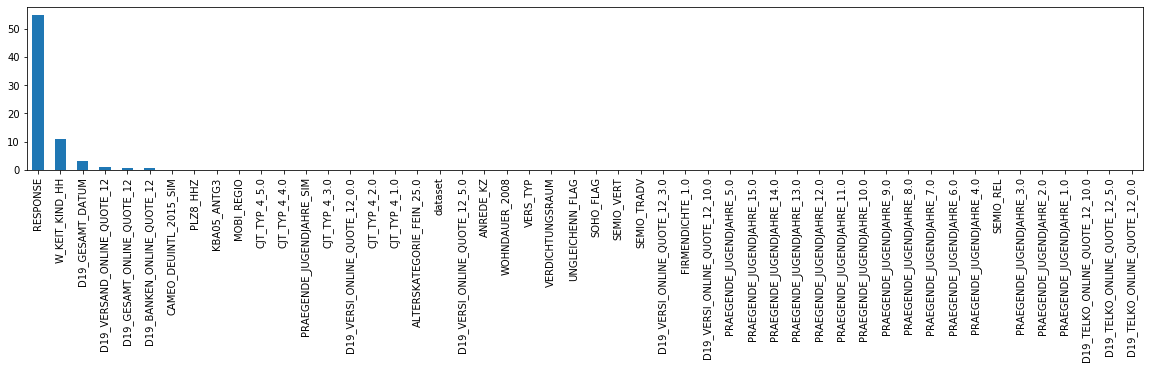

In [87]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

empty_cells = pd.DataFrame({'attribute':empty_cells.index, 'missingness':empty_cells})
#empty_cells = empty_cells[empty_cells['attribute']!='RESPONSE']
empty_cells

**a second round of imputation with frequency imputer**|

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'most_frequent')

original_responses = joint_dataset_imputed_df['RESPONSE']

joint_dataset_imputed_df = pd.DataFrame(imputer.fit_transform(joint_dataset_imputed_df),columns= joint_dataset_imputed_df.columns, index = joint_dataset_imputed_df.index)
joint_dataset_imputed_df['RESPONSE'] = original_responses




CPU times: user 223 ms, sys: 16 ms, total: 239 ms
Wall time: 239 ms


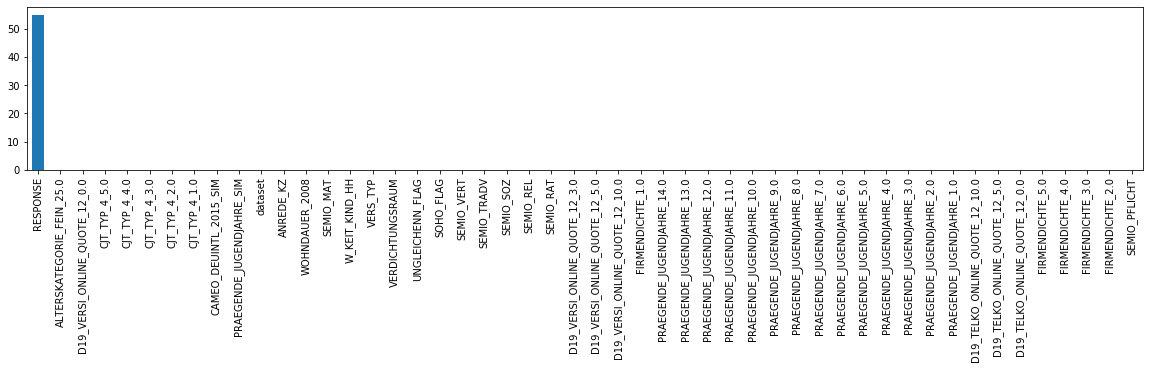

In [89]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

In [90]:
joint_dataset_imputed_df.to_csv("../arvato_data_processed/MAILOUTimputed.csv")

# RESPONSE variable
Before attempting any supervised learning method it might be worthwhile to notice the distribution of the target binary variable `RESPONSE`. We see that the feature is imbalanced, and this will influence subsequent modelling approaches, that abandon `accuracy` and focus on `ROC-AUC` approaches.

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([34658.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   436.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

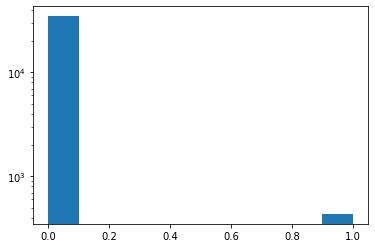

In [91]:
plt.hist(joint_dataset_imputed_df['RESPONSE'],log=True)